In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('dow_jones_data_clean.csv')

In [3]:
data.head()

,Date,Adj Close,Close,High,Low,Open,Volume,Ticker
0,1980-12-12 00:00:00+00:00,0.098943,0.128348,0.128906,0.128348,0.128348,469033600,AAPL
1,1980-12-15 00:00:00+00:00,0.093781,0.121652,0.122210,0.121652,0.122210,175884800,AAPL
2,1980-12-16 00:00:00+00:00,0.086898,0.112723,0.113281,0.112723,0.113281,105728000,AAPL
3,1980-12-17 00:00:00+00:00,0.089049,0.115513,0.116071,0.115513,0.115513,86441600,AAPL
4,1980-12-18 00:00:00+00:00,0.091630,0.118862,0.119420,0.118862,0.118862,73449600,AAPL


In [4]:
data.columns

Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
       'Ticker'],
      dtype='object')

In [5]:
data['Ticker'].unique()

array(['AAPL', 'MSFT', 'JPM', 'V', 'JNJ', 'WMT', 'PG', 'UNH', 'HD',
       'INTC', 'KO', 'DIS', 'MRK', 'IBM', 'TRV', 'NKE', 'MCD', 'GS',
       'AXP', 'CAT', 'MMM', 'BA', 'CVX', 'CSCO', 'XOM', 'GE', 'PFE', 'VZ'],
      dtype=object)

# Data Cleaning

Prior to bringing data into jupyter. I manually cleaned the columns in excel since each ticker had the columns repeated. Now the entire dataset has 8 columns instead of 130+.

In [6]:
# Convert 'Date' column to datetime and check date range
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# statistics for numerical columns
stats = data.describe()

# Check the date range and unique tickers
date_range = (data['Date'].min(), data['Date'].max())
unique_tickers = data['Ticker'].nunique()

# Show statistics, date range, and number of unique tickers
stats, date_range, unique_tickers

(           Adj Close          Close           High            Low  \
 count  361538.000000  361538.000000  361538.000000  361538.000000   
 mean       34.735950      44.823122      45.261430      44.365490   
 std        59.699655      64.121151      64.724787      63.490108   
 min         0.002845       0.005208       0.005208       0.004801   
 25%         1.324075       4.270833       4.312500       4.226386   
 50%        11.948401      21.945000      22.187500      21.690001   
 75%        40.156898      55.970001      56.500000      55.408287   
 max       605.400024     605.400024     608.630005     597.880005   
 
                 Open        Volume  
 count  361538.000000  3.615380e+05  
 mean       44.636039  2.053661e+07  
 std        64.223467  8.102556e+07  
 min         0.000000  0.000000e+00  
 25%         3.733622  2.124347e+06  
 50%        21.920000  5.294992e+06  
 75%        55.972920  1.253280e+07  
 max       604.260010  7.421641e+09  ,
 (Timestamp('1962-01-02 0

In [7]:
# Check for missing values and duplicates
missing_values = data.isnull().sum()
duplicates = data.duplicated().sum()
print(missing_values)
print(duplicates)

Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
Ticker       0
dtype: int64
0


Perfectly the data is clean and we can move onto some EDA to get a better understanding of the overall data.

# EDA

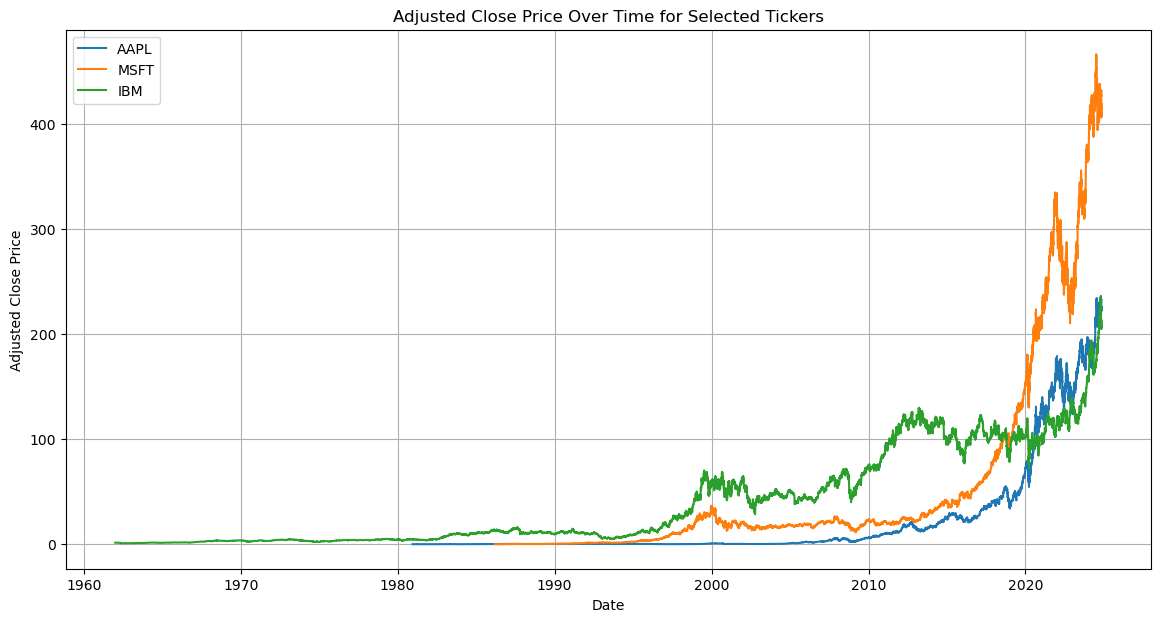

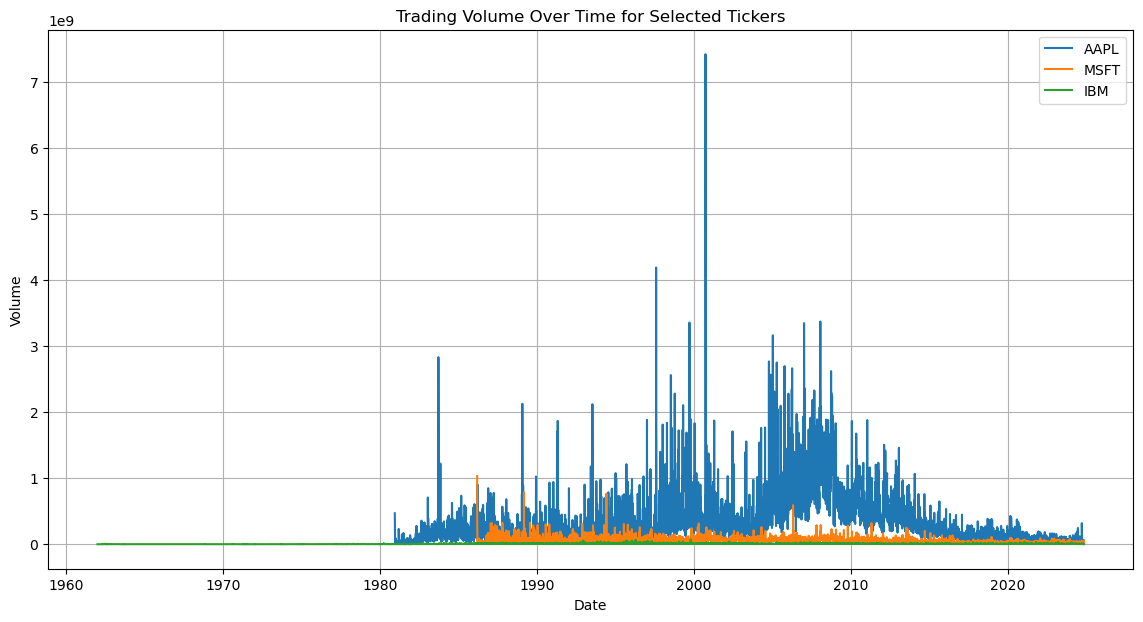

In [8]:
# Select a few tickers for visualization 'AAPL', 'MSFT', 'IBM'
selected_tickers = ['AAPL', 'MSFT', 'IBM']
data_filtered = data[data['Ticker'].isin(selected_tickers)]

# Plot for Adjusted Close prices over time
plt.figure(figsize=(14, 7))
for ticker in selected_tickers:
    ticker_data = data_filtered[data_filtered['Ticker'] == ticker]
    plt.plot(ticker_data['Date'], ticker_data['Adj Close'], label=ticker)

plt.title("Adjusted Close Price Over Time for Selected Tickers")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.legend()
plt.grid(True)
plt.show()

# Plot Volume over time for the tickers
plt.figure(figsize=(14, 7))
for ticker in selected_tickers:
    ticker_data = data_filtered[data_filtered['Ticker'] == ticker]
    plt.plot(ticker_data['Date'], ticker_data['Volume'], label=ticker)

plt.title("Trading Volume Over Time for Selected Tickers")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.grid(True)
plt.show()


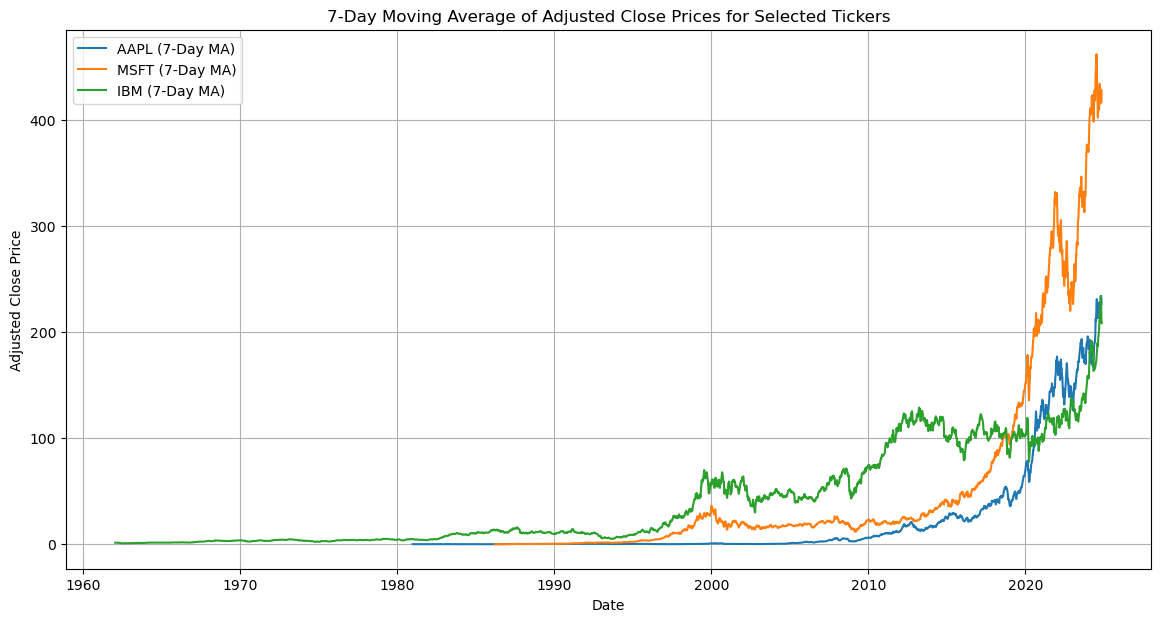

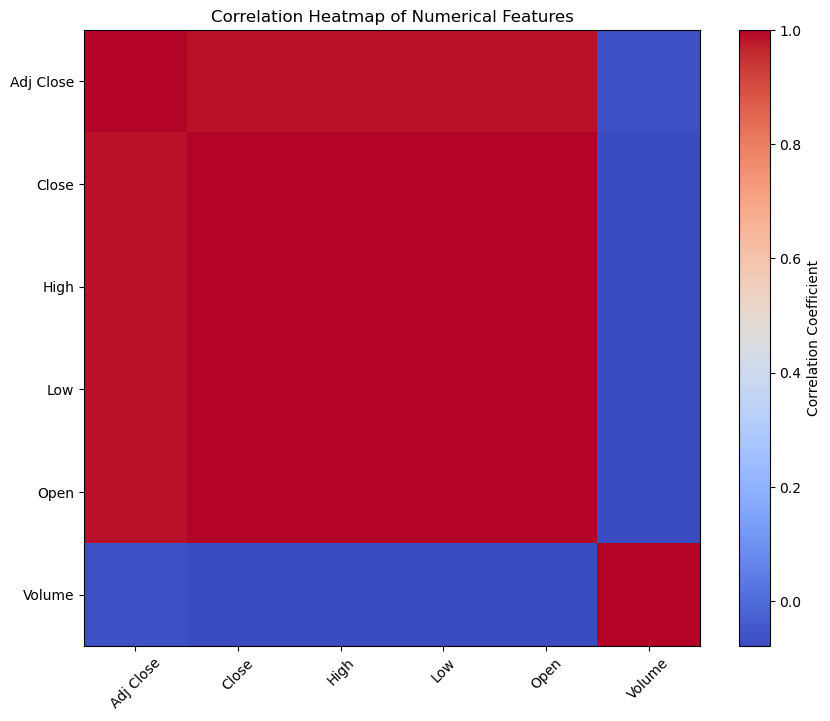

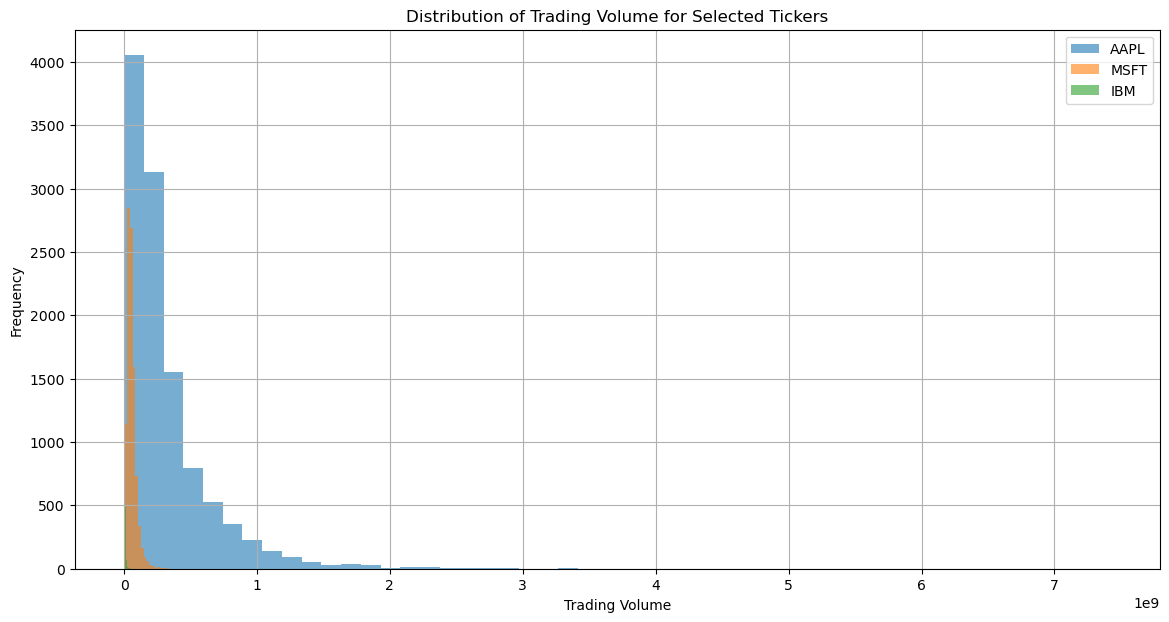

In [9]:
# Moving Average for Adjusted Close Price (7-day window) for tickers
selected_tickers = ['AAPL', 'MSFT', 'IBM']
data_filtered = data[data['Ticker'].isin(selected_tickers)]

plt.figure(figsize=(14, 7))
for ticker in selected_tickers:
    ticker_data = data_filtered[data_filtered['Ticker'] == ticker]
    ticker_data = ticker_data.set_index('Date').sort_index()
    ticker_data['7-Day MA'] = ticker_data['Adj Close'].rolling(window=7).mean()
    plt.plot(ticker_data.index, ticker_data['7-Day MA'], label=f"{ticker} (7-Day MA)")

plt.title("7-Day Moving Average of Adjusted Close Prices for Selected Tickers")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.legend()
plt.grid(True)
plt.show()

# Correlation Heatmap for numerical features
numerical_data = data[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']]
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10, 8))
plt.title("Correlation Heatmap of Numerical Features")
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(numerical_data.columns)), numerical_data.columns, rotation=45)
plt.yticks(range(len(numerical_data.columns)), numerical_data.columns)
plt.grid(False)
plt.show()

# Distribution of Trading Volume for the selected tickers
plt.figure(figsize=(14, 7))
for ticker in selected_tickers:
    ticker_data = data_filtered[data_filtered['Ticker'] == ticker]
    plt.hist(ticker_data['Volume'], bins=50, alpha=0.6, label=ticker)

plt.title("Distribution of Trading Volume for Selected Tickers")
plt.xlabel("Trading Volume")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


7-Day Moving Average:
- A smoother trendline reveals the fluctuations in adjusted close prices for selected tickers (AAPL, MSFT, IBM) over time, providing a clearer view of long-term movements.

Correlation Heatmap:
- Strong positive correlations are evident among Adj Close, Close, High, Low, and Open, as expected. Volume shows a weaker correlation with price metrics.
  
Trading Volume Distribution:
- Volume distributions vary significantly across the selected tickers. AAPL and MSFT exhibit higher frequency in mid-range trading volumes, while IBM trades at 

# Machine Learning

In [10]:
# Perform train/validation/test split
# train_data = data[data['Date'] <= '2017-12-31']
# val_data = data[(data['Date'] > '2017-12-31') & (data['Date'] <= '2020-12-31')]
# test_data = data[data['Date'] > '2020-12-31']

# Perform train/validation/test split and ensure 'Date' is included
train_data = data[data['Date'] <= '2017-12-31'].copy()
val_data = data[(data['Date'] > '2017-12-31') & (data['Date'] <= '2020-12-31')].copy()
test_data = data[data['Date'] > '2020-12-31'].copy()

In [11]:
# Check the sizes of each split
split_sizes = {
    "Train": train_data.shape,
    "Validation": val_data.shape,
    "Test": test_data.shape
}
print (split_sizes)

{'Train': (313268, 8), 'Validation': (21168, 8), 'Test': (27102, 8)}


### Prophet

In [12]:
from prophet import Prophet

00:14:55 - cmdstanpy - INFO - Chain [1] start processing
00:14:57 - cmdstanpy - INFO - Chain [1] done processing


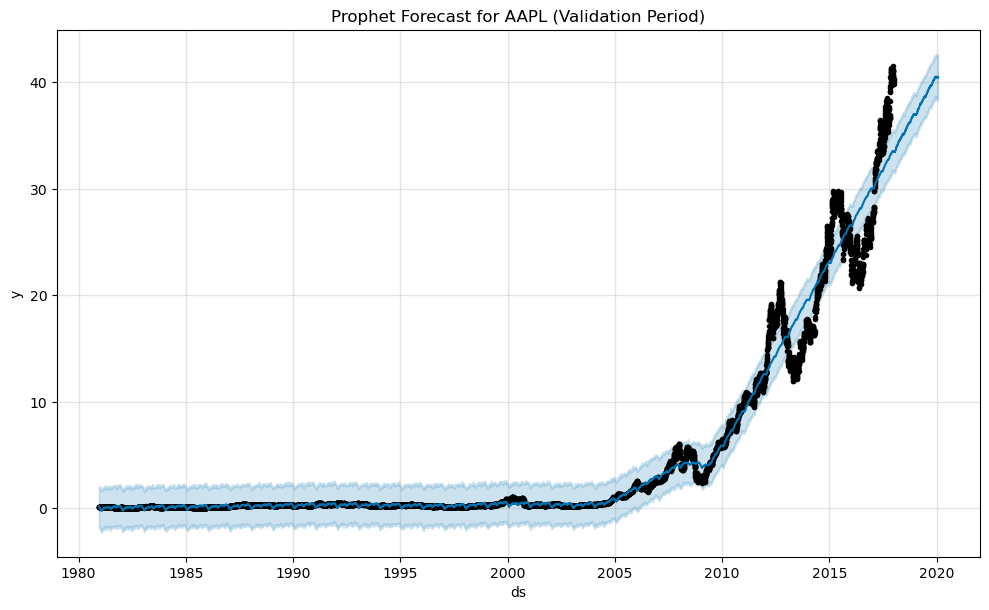

,y,yhat,yhat_lower,yhat_upper
ds,,,,
2018-01-02,40.568932,33.523385,31.699665,35.519013
2018-01-03,40.561871,33.530082,31.481484,35.404877
2018-01-04,40.750278,33.526265,31.629547,35.551814
2018-01-05,41.214226,33.517774,31.740713,35.400172
2018-01-08,41.061142,33.523405,31.623559,35.464000


In [13]:
# Prepare data for Prophet: selecting AAPL as an example
aapl_data = data[data['Ticker'] == 'AAPL'][['Date', 'Adj Close']]
aapl_data = aapl_data.rename(columns={'Date': 'ds', 'Adj Close': 'y'})

# Remove timezone from the 'Date' column
aapl_data['ds'] = aapl_data['ds'].dt.tz_localize(None)

# Split the data into train and validation again after cleaning
prophet_train = aapl_data[aapl_data['ds'] <= '2017-12-31']
prophet_val = aapl_data[(aapl_data['ds'] > '2017-12-31') & (aapl_data['ds'] <= '2020-12-31')]

# Initialize and fit the Prophet model
model = Prophet()
model.fit(prophet_train)

# Forecast on the validation set
future_dates = model.make_future_dataframe(periods=len(prophet_val), freq='D')
forecast = model.predict(future_dates)

# Plot the forecast
fig = model.plot(forecast)
plt.title("Prophet Forecast for AAPL (Validation Period)")
plt.show()

# Merge forecast with validation set for comparison
prophet_val = prophet_val.set_index('ds')
forecast_validation = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']]
comparison = prophet_val.join(forecast_validation, how='inner')

comparison.head()

00:14:59 - cmdstanpy - INFO - Chain [1] start processing
00:15:02 - cmdstanpy - INFO - Chain [1] done processing


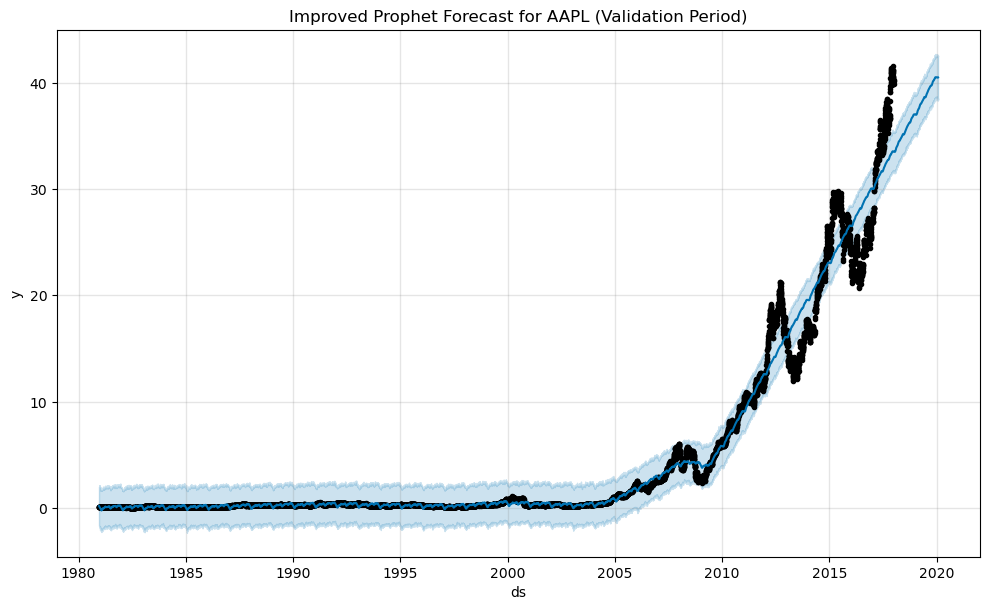

(11.259258059144612, 13.474574504244236)

In [14]:
# Improve Prophet model for AAPL - adding seasonality and tuning parameters
model_improved = Prophet(
    daily_seasonality=True,
    yearly_seasonality=True,
    changepoint_prior_scale=0.1,  # Tune this parameter for flexibility
    seasonality_prior_scale=0.1  # Adjust the influence of seasonality
)

# Fit the improved model
model_improved.fit(prophet_train)

# Forecast on the validation set
forecast_improved = model_improved.predict(future_dates)

# Plot the improved forecast
fig_improved = model_improved.plot(forecast_improved)
plt.title("Improved Prophet Forecast for AAPL (Validation Period)")
plt.show()

# Calculate error metrics for validation
prophet_val['yhat'] = forecast_improved.set_index('ds')['yhat']
mae = np.mean(np.abs(prophet_val['y'] - prophet_val['yhat']))
rmse = np.sqrt(np.mean((prophet_val['y'] - prophet_val['yhat']) ** 2))

mae, rmse

In [15]:
from prophet.diagnostics import cross_validation, performance_metrics

# Perform cross-validation
cv_results = cross_validation(
    model_improved, 
    initial='1825 days',  # First 5 years as initial training
    period='180 days',    # Rolling forecast every 6 months
    horizon='365 days'    # Forecast for the next 1 year
)

performance = performance_metrics(cv_results)
print(performance.head())

  0%|          | 0/64 [00:00<?, ?it/s]

00:15:04 - cmdstanpy - INFO - Chain [1] start processing
00:15:04 - cmdstanpy - INFO - Chain [1] done processing
00:15:04 - cmdstanpy - INFO - Chain [1] start processing
00:15:05 - cmdstanpy - INFO - Chain [1] done processing
00:15:05 - cmdstanpy - INFO - Chain [1] start processing
00:15:06 - cmdstanpy - INFO - Chain [1] done processing
00:15:06 - cmdstanpy - INFO - Chain [1] start processing
00:15:07 - cmdstanpy - INFO - Chain [1] done processing
00:15:07 - cmdstanpy - INFO - Chain [1] start processing
00:15:07 - cmdstanpy - INFO - Chain [1] done processing
00:15:08 - cmdstanpy - INFO - Chain [1] start processing
00:15:08 - cmdstanpy - INFO - Chain [1] done processing
00:15:08 - cmdstanpy - INFO - Chain [1] start processing
00:15:09 - cmdstanpy - INFO - Chain [1] done processing
00:15:09 - cmdstanpy - INFO - Chain [1] start processing
00:15:10 - cmdstanpy - INFO - Chain [1] done processing
00:15:10 - cmdstanpy - INFO - Chain [1] start processing
00:15:11 - cmdstanpy - INFO - Chain [1]

  horizon       mse      rmse       mae      mape     mdape     smape  \
0 37 days  2.731567  1.652745  0.834074  0.292778  0.203216  0.290139   
1 38 days  2.756413  1.660245  0.836152  0.293633  0.203815  0.290909   
2 39 days  2.808641  1.675900  0.844192  0.295150  0.204476  0.292560   
3 40 days  2.825030  1.680782  0.847937  0.297615  0.205257  0.295024   
4 41 days  2.832783  1.683087  0.848185  0.298072  0.205257  0.295942   

   coverage  
0  0.287976  
1  0.285874  
2  0.282648  
3  0.275406  
4  0.272198  


The cross-validation results summarize the performance of your model over different horizons (forecast durations). Here’s what each metric indicates:
- horizon: The forecast horizon (number of days into the future) for which the performance is evaluated.

- mse (Mean Squared Error): The average of the squared differences between the predicted and actual values. Lower values indicate better performance.

- rmse (Root Mean Squared Error): The square root of MSE. It is in the same units as the target variable (e.g., stock price). Lower values indicate better accuracy.

- mae (Mean Absolute Error): The average of the absolute differences between predicted and actual values. It is less sensitive to outliers than RMSE.

- mape (Mean Absolute Percentage Error): The average percentage error. Useful for comparing forecasts across datasets.

- mdape (Median Absolute Percentage Error): The median percentage error. Less sensitive to outliers than MAPE.

- smape (Symmetric Mean Absolute Percentage Error): A symmetric version of MAPE that avoids over-penalizing over- or under-forecasts.
coverage: The proportion of actual values that fall within the forecast confidence intervals. Higher coverage indicates more reliable uncertainty estimates.

Choosing the best horizon would depend on our main purpose of the model for example if we're more interested in short-term predictions, focus on horizons with lower RMSE and MAE at shorter durations. 37 day horizon performed the best so I will now do hyperparameter tuning and see how performance improves.

In [16]:
# Define parameter grid
param_grid = {
    'changepoint_prior_scale': [0.01, 0.1, 0.5, 1.0],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0]
}

# Initialize variables to track the best parameters
best_params = None
best_rmse = float('inf')

# Iterate over all combinations of parameters
for cp in param_grid['changepoint_prior_scale']:
    for sp in param_grid['seasonality_prior_scale']:
        # Initialize and fit the model with current parameters
        model = Prophet(
            changepoint_prior_scale=cp,
            seasonality_prior_scale=sp,
            daily_seasonality=True,
            yearly_seasonality=True
        )
        model.fit(prophet_train)

        # Perform cross-validation with a fixed 37-day horizon
        cv_results = cross_validation(
            model,
            initial='1825 days',  # First 5 years as training data
            period='180 days',    # Every 6 months
            horizon='37 days'     # Fixed 37-day horizon
        )

        # Evaluate performance metrics
        performance = performance_metrics(cv_results)
        rmse = performance.loc[performance['horizon'] == '37 days', 'rmse'].values[0]

        # Track the best parameters
        if rmse < best_rmse:
            best_rmse = rmse
            best_params = {'changepoint_prior_scale': cp, 'seasonality_prior_scale': sp}

        print(f"CP: {cp}, SP: {sp}, RMSE: {rmse}")

# Display the best parameters
print("Best Parameters:", best_params)
print("Best RMSE:", best_rmse)

00:17:10 - cmdstanpy - INFO - Chain [1] start processing
00:17:12 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/65 [00:00<?, ?it/s]

00:17:13 - cmdstanpy - INFO - Chain [1] start processing
00:17:13 - cmdstanpy - INFO - Chain [1] done processing
00:17:13 - cmdstanpy - INFO - Chain [1] start processing
00:17:13 - cmdstanpy - INFO - Chain [1] done processing
00:17:13 - cmdstanpy - INFO - Chain [1] start processing
00:17:14 - cmdstanpy - INFO - Chain [1] done processing
00:17:14 - cmdstanpy - INFO - Chain [1] start processing
00:17:14 - cmdstanpy - INFO - Chain [1] done processing
00:17:14 - cmdstanpy - INFO - Chain [1] start processing
00:17:14 - cmdstanpy - INFO - Chain [1] done processing
00:17:15 - cmdstanpy - INFO - Chain [1] start processing
00:17:15 - cmdstanpy - INFO - Chain [1] done processing
00:17:15 - cmdstanpy - INFO - Chain [1] start processing
00:17:15 - cmdstanpy - INFO - Chain [1] done processing
00:17:16 - cmdstanpy - INFO - Chain [1] start processing
00:17:16 - cmdstanpy - INFO - Chain [1] done processing
00:17:16 - cmdstanpy - INFO - Chain [1] start processing
00:17:16 - cmdstanpy - INFO - Chain [1]

CP: 0.01, SP: 0.01, RMSE: 1.9556963616872451


00:18:26 - cmdstanpy - INFO - Chain [1] start processing
00:18:27 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/65 [00:00<?, ?it/s]

00:18:28 - cmdstanpy - INFO - Chain [1] start processing
00:18:28 - cmdstanpy - INFO - Chain [1] done processing
00:18:29 - cmdstanpy - INFO - Chain [1] start processing
00:18:29 - cmdstanpy - INFO - Chain [1] done processing
00:18:29 - cmdstanpy - INFO - Chain [1] start processing
00:18:29 - cmdstanpy - INFO - Chain [1] done processing
00:18:29 - cmdstanpy - INFO - Chain [1] start processing
00:18:30 - cmdstanpy - INFO - Chain [1] done processing
00:18:30 - cmdstanpy - INFO - Chain [1] start processing
00:18:30 - cmdstanpy - INFO - Chain [1] done processing
00:18:30 - cmdstanpy - INFO - Chain [1] start processing
00:18:30 - cmdstanpy - INFO - Chain [1] done processing
00:18:31 - cmdstanpy - INFO - Chain [1] start processing
00:18:31 - cmdstanpy - INFO - Chain [1] done processing
00:18:31 - cmdstanpy - INFO - Chain [1] start processing
00:18:31 - cmdstanpy - INFO - Chain [1] done processing
00:18:32 - cmdstanpy - INFO - Chain [1] start processing
00:18:32 - cmdstanpy - INFO - Chain [1]

CP: 0.01, SP: 0.1, RMSE: 1.9559231994485564


00:19:42 - cmdstanpy - INFO - Chain [1] start processing
00:19:44 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/65 [00:00<?, ?it/s]

00:19:45 - cmdstanpy - INFO - Chain [1] start processing
00:19:45 - cmdstanpy - INFO - Chain [1] done processing
00:19:45 - cmdstanpy - INFO - Chain [1] start processing
00:19:45 - cmdstanpy - INFO - Chain [1] done processing
00:19:45 - cmdstanpy - INFO - Chain [1] start processing
00:19:45 - cmdstanpy - INFO - Chain [1] done processing
00:19:46 - cmdstanpy - INFO - Chain [1] start processing
00:19:46 - cmdstanpy - INFO - Chain [1] done processing
00:19:46 - cmdstanpy - INFO - Chain [1] start processing
00:19:46 - cmdstanpy - INFO - Chain [1] done processing
00:19:47 - cmdstanpy - INFO - Chain [1] start processing
00:19:47 - cmdstanpy - INFO - Chain [1] done processing
00:19:47 - cmdstanpy - INFO - Chain [1] start processing
00:19:47 - cmdstanpy - INFO - Chain [1] done processing
00:19:48 - cmdstanpy - INFO - Chain [1] start processing
00:19:48 - cmdstanpy - INFO - Chain [1] done processing
00:19:48 - cmdstanpy - INFO - Chain [1] start processing
00:19:48 - cmdstanpy - INFO - Chain [1]

CP: 0.01, SP: 1.0, RMSE: 1.9547196992016929


00:20:59 - cmdstanpy - INFO - Chain [1] start processing
00:21:00 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/65 [00:00<?, ?it/s]

00:21:01 - cmdstanpy - INFO - Chain [1] start processing
00:21:01 - cmdstanpy - INFO - Chain [1] done processing
00:21:01 - cmdstanpy - INFO - Chain [1] start processing
00:21:01 - cmdstanpy - INFO - Chain [1] done processing
00:21:01 - cmdstanpy - INFO - Chain [1] start processing
00:21:02 - cmdstanpy - INFO - Chain [1] done processing
00:21:02 - cmdstanpy - INFO - Chain [1] start processing
00:21:02 - cmdstanpy - INFO - Chain [1] done processing
00:21:02 - cmdstanpy - INFO - Chain [1] start processing
00:21:02 - cmdstanpy - INFO - Chain [1] done processing
00:21:03 - cmdstanpy - INFO - Chain [1] start processing
00:21:03 - cmdstanpy - INFO - Chain [1] done processing
00:21:03 - cmdstanpy - INFO - Chain [1] start processing
00:21:04 - cmdstanpy - INFO - Chain [1] done processing
00:21:04 - cmdstanpy - INFO - Chain [1] start processing
00:21:04 - cmdstanpy - INFO - Chain [1] done processing
00:21:04 - cmdstanpy - INFO - Chain [1] start processing
00:21:04 - cmdstanpy - INFO - Chain [1]

CP: 0.01, SP: 10.0, RMSE: 1.951510604819801


00:22:16 - cmdstanpy - INFO - Chain [1] start processing
00:22:18 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/65 [00:00<?, ?it/s]

00:22:19 - cmdstanpy - INFO - Chain [1] start processing
00:22:19 - cmdstanpy - INFO - Chain [1] done processing
00:22:20 - cmdstanpy - INFO - Chain [1] start processing
00:22:20 - cmdstanpy - INFO - Chain [1] done processing
00:22:20 - cmdstanpy - INFO - Chain [1] start processing
00:22:21 - cmdstanpy - INFO - Chain [1] done processing
00:22:21 - cmdstanpy - INFO - Chain [1] start processing
00:22:22 - cmdstanpy - INFO - Chain [1] done processing
00:22:22 - cmdstanpy - INFO - Chain [1] start processing
00:22:22 - cmdstanpy - INFO - Chain [1] done processing
00:22:23 - cmdstanpy - INFO - Chain [1] start processing
00:22:24 - cmdstanpy - INFO - Chain [1] done processing
00:22:24 - cmdstanpy - INFO - Chain [1] start processing
00:22:24 - cmdstanpy - INFO - Chain [1] done processing
00:22:25 - cmdstanpy - INFO - Chain [1] start processing
00:22:25 - cmdstanpy - INFO - Chain [1] done processing
00:22:26 - cmdstanpy - INFO - Chain [1] start processing
00:22:26 - cmdstanpy - INFO - Chain [1]

CP: 0.1, SP: 0.01, RMSE: 1.9615382877158416


00:24:29 - cmdstanpy - INFO - Chain [1] start processing
00:24:32 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/65 [00:00<?, ?it/s]

00:24:32 - cmdstanpy - INFO - Chain [1] start processing
00:24:33 - cmdstanpy - INFO - Chain [1] done processing
00:24:33 - cmdstanpy - INFO - Chain [1] start processing
00:24:34 - cmdstanpy - INFO - Chain [1] done processing
00:24:34 - cmdstanpy - INFO - Chain [1] start processing
00:24:35 - cmdstanpy - INFO - Chain [1] done processing
00:24:35 - cmdstanpy - INFO - Chain [1] start processing
00:24:35 - cmdstanpy - INFO - Chain [1] done processing
00:24:36 - cmdstanpy - INFO - Chain [1] start processing
00:24:36 - cmdstanpy - INFO - Chain [1] done processing
00:24:36 - cmdstanpy - INFO - Chain [1] start processing
00:24:37 - cmdstanpy - INFO - Chain [1] done processing
00:24:37 - cmdstanpy - INFO - Chain [1] start processing
00:24:38 - cmdstanpy - INFO - Chain [1] done processing
00:24:38 - cmdstanpy - INFO - Chain [1] start processing
00:24:39 - cmdstanpy - INFO - Chain [1] done processing
00:24:39 - cmdstanpy - INFO - Chain [1] start processing
00:24:40 - cmdstanpy - INFO - Chain [1]

CP: 0.1, SP: 0.1, RMSE: 1.9637961583760775


00:26:39 - cmdstanpy - INFO - Chain [1] start processing
00:26:42 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/65 [00:00<?, ?it/s]

00:26:43 - cmdstanpy - INFO - Chain [1] start processing
00:26:44 - cmdstanpy - INFO - Chain [1] done processing
00:26:44 - cmdstanpy - INFO - Chain [1] start processing
00:26:44 - cmdstanpy - INFO - Chain [1] done processing
00:26:45 - cmdstanpy - INFO - Chain [1] start processing
00:26:45 - cmdstanpy - INFO - Chain [1] done processing
00:26:46 - cmdstanpy - INFO - Chain [1] start processing
00:26:46 - cmdstanpy - INFO - Chain [1] done processing
00:26:46 - cmdstanpy - INFO - Chain [1] start processing
00:26:47 - cmdstanpy - INFO - Chain [1] done processing
00:26:47 - cmdstanpy - INFO - Chain [1] start processing
00:26:48 - cmdstanpy - INFO - Chain [1] done processing
00:26:48 - cmdstanpy - INFO - Chain [1] start processing
00:26:49 - cmdstanpy - INFO - Chain [1] done processing
00:26:49 - cmdstanpy - INFO - Chain [1] start processing
00:26:50 - cmdstanpy - INFO - Chain [1] done processing
00:26:50 - cmdstanpy - INFO - Chain [1] start processing
00:26:51 - cmdstanpy - INFO - Chain [1]

CP: 0.1, SP: 1.0, RMSE: 1.9633899752263377


00:28:50 - cmdstanpy - INFO - Chain [1] start processing
00:28:52 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/65 [00:00<?, ?it/s]

00:28:53 - cmdstanpy - INFO - Chain [1] start processing
00:28:53 - cmdstanpy - INFO - Chain [1] done processing
00:28:54 - cmdstanpy - INFO - Chain [1] start processing
00:28:54 - cmdstanpy - INFO - Chain [1] done processing
00:28:54 - cmdstanpy - INFO - Chain [1] start processing
00:28:55 - cmdstanpy - INFO - Chain [1] done processing
00:28:55 - cmdstanpy - INFO - Chain [1] start processing
00:28:56 - cmdstanpy - INFO - Chain [1] done processing
00:28:56 - cmdstanpy - INFO - Chain [1] start processing
00:28:56 - cmdstanpy - INFO - Chain [1] done processing
00:28:57 - cmdstanpy - INFO - Chain [1] start processing
00:28:57 - cmdstanpy - INFO - Chain [1] done processing
00:28:58 - cmdstanpy - INFO - Chain [1] start processing
00:28:58 - cmdstanpy - INFO - Chain [1] done processing
00:28:59 - cmdstanpy - INFO - Chain [1] start processing
00:28:59 - cmdstanpy - INFO - Chain [1] done processing
00:29:00 - cmdstanpy - INFO - Chain [1] start processing
00:29:01 - cmdstanpy - INFO - Chain [1]

CP: 0.1, SP: 10.0, RMSE: 1.9630683302800718


00:31:01 - cmdstanpy - INFO - Chain [1] start processing
00:31:03 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/65 [00:00<?, ?it/s]

00:31:04 - cmdstanpy - INFO - Chain [1] start processing
00:31:04 - cmdstanpy - INFO - Chain [1] done processing
00:31:04 - cmdstanpy - INFO - Chain [1] start processing
00:31:05 - cmdstanpy - INFO - Chain [1] done processing
00:31:05 - cmdstanpy - INFO - Chain [1] start processing
00:31:06 - cmdstanpy - INFO - Chain [1] done processing
00:31:06 - cmdstanpy - INFO - Chain [1] start processing
00:31:07 - cmdstanpy - INFO - Chain [1] done processing
00:31:07 - cmdstanpy - INFO - Chain [1] start processing
00:31:08 - cmdstanpy - INFO - Chain [1] done processing
00:31:09 - cmdstanpy - INFO - Chain [1] start processing
00:31:10 - cmdstanpy - INFO - Chain [1] done processing
00:31:10 - cmdstanpy - INFO - Chain [1] start processing
00:31:11 - cmdstanpy - INFO - Chain [1] done processing
00:31:11 - cmdstanpy - INFO - Chain [1] start processing
00:31:12 - cmdstanpy - INFO - Chain [1] done processing
00:31:12 - cmdstanpy - INFO - Chain [1] start processing
00:31:13 - cmdstanpy - INFO - Chain [1]

CP: 0.5, SP: 0.01, RMSE: 1.9635051800803074


00:33:31 - cmdstanpy - INFO - Chain [1] start processing
00:33:34 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/65 [00:00<?, ?it/s]

00:33:35 - cmdstanpy - INFO - Chain [1] start processing
00:33:35 - cmdstanpy - INFO - Chain [1] done processing
00:33:35 - cmdstanpy - INFO - Chain [1] start processing
00:33:36 - cmdstanpy - INFO - Chain [1] done processing
00:33:36 - cmdstanpy - INFO - Chain [1] start processing
00:33:37 - cmdstanpy - INFO - Chain [1] done processing
00:33:37 - cmdstanpy - INFO - Chain [1] start processing
00:33:38 - cmdstanpy - INFO - Chain [1] done processing
00:33:38 - cmdstanpy - INFO - Chain [1] start processing
00:33:39 - cmdstanpy - INFO - Chain [1] done processing
00:33:39 - cmdstanpy - INFO - Chain [1] start processing
00:33:40 - cmdstanpy - INFO - Chain [1] done processing
00:33:40 - cmdstanpy - INFO - Chain [1] start processing
00:33:41 - cmdstanpy - INFO - Chain [1] done processing
00:33:41 - cmdstanpy - INFO - Chain [1] start processing
00:33:42 - cmdstanpy - INFO - Chain [1] done processing
00:33:43 - cmdstanpy - INFO - Chain [1] start processing
00:33:43 - cmdstanpy - INFO - Chain [1]

CP: 0.5, SP: 0.1, RMSE: 1.9638779616874873


00:35:53 - cmdstanpy - INFO - Chain [1] start processing
00:35:56 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/65 [00:00<?, ?it/s]

00:35:57 - cmdstanpy - INFO - Chain [1] start processing
00:35:57 - cmdstanpy - INFO - Chain [1] done processing
00:35:57 - cmdstanpy - INFO - Chain [1] start processing
00:35:58 - cmdstanpy - INFO - Chain [1] done processing
00:35:58 - cmdstanpy - INFO - Chain [1] start processing
00:35:59 - cmdstanpy - INFO - Chain [1] done processing
00:35:59 - cmdstanpy - INFO - Chain [1] start processing
00:36:00 - cmdstanpy - INFO - Chain [1] done processing
00:36:00 - cmdstanpy - INFO - Chain [1] start processing
00:36:01 - cmdstanpy - INFO - Chain [1] done processing
00:36:01 - cmdstanpy - INFO - Chain [1] start processing
00:36:02 - cmdstanpy - INFO - Chain [1] done processing
00:36:03 - cmdstanpy - INFO - Chain [1] start processing
00:36:03 - cmdstanpy - INFO - Chain [1] done processing
00:36:04 - cmdstanpy - INFO - Chain [1] start processing
00:36:04 - cmdstanpy - INFO - Chain [1] done processing
00:36:05 - cmdstanpy - INFO - Chain [1] start processing
00:36:06 - cmdstanpy - INFO - Chain [1]

CP: 0.5, SP: 1.0, RMSE: 1.961943372479712


00:38:19 - cmdstanpy - INFO - Chain [1] start processing
00:38:21 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/65 [00:00<?, ?it/s]

00:38:22 - cmdstanpy - INFO - Chain [1] start processing
00:38:23 - cmdstanpy - INFO - Chain [1] done processing
00:38:23 - cmdstanpy - INFO - Chain [1] start processing
00:38:23 - cmdstanpy - INFO - Chain [1] done processing
00:38:24 - cmdstanpy - INFO - Chain [1] start processing
00:38:24 - cmdstanpy - INFO - Chain [1] done processing
00:38:25 - cmdstanpy - INFO - Chain [1] start processing
00:38:25 - cmdstanpy - INFO - Chain [1] done processing
00:38:25 - cmdstanpy - INFO - Chain [1] start processing
00:38:26 - cmdstanpy - INFO - Chain [1] done processing
00:38:26 - cmdstanpy - INFO - Chain [1] start processing
00:38:27 - cmdstanpy - INFO - Chain [1] done processing
00:38:28 - cmdstanpy - INFO - Chain [1] start processing
00:38:28 - cmdstanpy - INFO - Chain [1] done processing
00:38:29 - cmdstanpy - INFO - Chain [1] start processing
00:38:30 - cmdstanpy - INFO - Chain [1] done processing
00:38:30 - cmdstanpy - INFO - Chain [1] start processing
00:38:31 - cmdstanpy - INFO - Chain [1]

CP: 0.5, SP: 10.0, RMSE: 1.962104370318754


00:40:44 - cmdstanpy - INFO - Chain [1] start processing
00:40:47 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/65 [00:00<?, ?it/s]

00:40:48 - cmdstanpy - INFO - Chain [1] start processing
00:40:48 - cmdstanpy - INFO - Chain [1] done processing
00:40:48 - cmdstanpy - INFO - Chain [1] start processing
00:40:49 - cmdstanpy - INFO - Chain [1] done processing
00:40:49 - cmdstanpy - INFO - Chain [1] start processing
00:40:50 - cmdstanpy - INFO - Chain [1] done processing
00:40:50 - cmdstanpy - INFO - Chain [1] start processing
00:40:51 - cmdstanpy - INFO - Chain [1] done processing
00:40:51 - cmdstanpy - INFO - Chain [1] start processing
00:40:52 - cmdstanpy - INFO - Chain [1] done processing
00:40:53 - cmdstanpy - INFO - Chain [1] start processing
00:40:54 - cmdstanpy - INFO - Chain [1] done processing
00:40:54 - cmdstanpy - INFO - Chain [1] start processing
00:40:55 - cmdstanpy - INFO - Chain [1] done processing
00:40:55 - cmdstanpy - INFO - Chain [1] start processing
00:40:56 - cmdstanpy - INFO - Chain [1] done processing
00:40:56 - cmdstanpy - INFO - Chain [1] start processing
00:40:57 - cmdstanpy - INFO - Chain [1]

CP: 1.0, SP: 0.01, RMSE: 1.964370170237235


00:43:16 - cmdstanpy - INFO - Chain [1] start processing
00:43:19 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/65 [00:00<?, ?it/s]

00:43:20 - cmdstanpy - INFO - Chain [1] start processing
00:43:20 - cmdstanpy - INFO - Chain [1] done processing
00:43:20 - cmdstanpy - INFO - Chain [1] start processing
00:43:21 - cmdstanpy - INFO - Chain [1] done processing
00:43:21 - cmdstanpy - INFO - Chain [1] start processing
00:43:22 - cmdstanpy - INFO - Chain [1] done processing
00:43:22 - cmdstanpy - INFO - Chain [1] start processing
00:43:22 - cmdstanpy - INFO - Chain [1] done processing
00:43:23 - cmdstanpy - INFO - Chain [1] start processing
00:43:24 - cmdstanpy - INFO - Chain [1] done processing
00:43:24 - cmdstanpy - INFO - Chain [1] start processing
00:43:25 - cmdstanpy - INFO - Chain [1] done processing
00:43:25 - cmdstanpy - INFO - Chain [1] start processing
00:43:26 - cmdstanpy - INFO - Chain [1] done processing
00:43:26 - cmdstanpy - INFO - Chain [1] start processing
00:43:27 - cmdstanpy - INFO - Chain [1] done processing
00:43:27 - cmdstanpy - INFO - Chain [1] start processing
00:43:28 - cmdstanpy - INFO - Chain [1]

CP: 1.0, SP: 0.1, RMSE: 1.9600190875786887


00:45:44 - cmdstanpy - INFO - Chain [1] start processing
00:45:46 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/65 [00:00<?, ?it/s]

00:45:47 - cmdstanpy - INFO - Chain [1] start processing
00:45:48 - cmdstanpy - INFO - Chain [1] done processing
00:45:48 - cmdstanpy - INFO - Chain [1] start processing
00:45:49 - cmdstanpy - INFO - Chain [1] done processing
00:45:49 - cmdstanpy - INFO - Chain [1] start processing
00:45:50 - cmdstanpy - INFO - Chain [1] done processing
00:45:50 - cmdstanpy - INFO - Chain [1] start processing
00:45:50 - cmdstanpy - INFO - Chain [1] done processing
00:45:51 - cmdstanpy - INFO - Chain [1] start processing
00:45:51 - cmdstanpy - INFO - Chain [1] done processing
00:45:52 - cmdstanpy - INFO - Chain [1] start processing
00:45:53 - cmdstanpy - INFO - Chain [1] done processing
00:45:53 - cmdstanpy - INFO - Chain [1] start processing
00:45:54 - cmdstanpy - INFO - Chain [1] done processing
00:45:54 - cmdstanpy - INFO - Chain [1] start processing
00:45:55 - cmdstanpy - INFO - Chain [1] done processing
00:45:55 - cmdstanpy - INFO - Chain [1] start processing
00:45:56 - cmdstanpy - INFO - Chain [1]

CP: 1.0, SP: 1.0, RMSE: 1.960442901650031


00:48:09 - cmdstanpy - INFO - Chain [1] start processing
00:48:11 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/65 [00:00<?, ?it/s]

00:48:12 - cmdstanpy - INFO - Chain [1] start processing
00:48:12 - cmdstanpy - INFO - Chain [1] done processing
00:48:13 - cmdstanpy - INFO - Chain [1] start processing
00:48:13 - cmdstanpy - INFO - Chain [1] done processing
00:48:13 - cmdstanpy - INFO - Chain [1] start processing
00:48:14 - cmdstanpy - INFO - Chain [1] done processing
00:48:14 - cmdstanpy - INFO - Chain [1] start processing
00:48:15 - cmdstanpy - INFO - Chain [1] done processing
00:48:15 - cmdstanpy - INFO - Chain [1] start processing
00:48:16 - cmdstanpy - INFO - Chain [1] done processing
00:48:17 - cmdstanpy - INFO - Chain [1] start processing
00:48:18 - cmdstanpy - INFO - Chain [1] done processing
00:48:18 - cmdstanpy - INFO - Chain [1] start processing
00:48:19 - cmdstanpy - INFO - Chain [1] done processing
00:48:19 - cmdstanpy - INFO - Chain [1] start processing
00:48:20 - cmdstanpy - INFO - Chain [1] done processing
00:48:20 - cmdstanpy - INFO - Chain [1] start processing
00:48:21 - cmdstanpy - INFO - Chain [1]

CP: 1.0, SP: 10.0, RMSE: 1.9629581863949463
Best Parameters: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10.0}
Best RMSE: 1.951510604819801


In [17]:
# Define parameter grid
param_grid = {
    'changepoint_prior_scale': [0.0001, 0.001, 0.01],
    'seasonality_prior_scale': [0.0001, 0.001, 0.01]
}

# Initialize variables to track the best parameters
best_params = None
best_rmse = float('inf')

# Iterate over all combinations of parameters
for cp in param_grid['changepoint_prior_scale']:
    for sp in param_grid['seasonality_prior_scale']:
        # Initialize and fit the model with current parameters
        model = Prophet(
            changepoint_prior_scale=cp,
            seasonality_prior_scale=sp,
            daily_seasonality=True,
            yearly_seasonality=True
        )
        model.fit(prophet_train)

        # Perform cross-validation with a fixed 37-day horizon
        cv_results = cross_validation(
            model,
            initial='1825 days',  # First 5 years as training data
            period='180 days',    # Every 6 months
            horizon='37 days'     # Fixed 37-day horizon
        )

        # Evaluate performance metrics
        performance = performance_metrics(cv_results)
        rmse = performance.loc[performance['horizon'] == '37 days', 'rmse'].values[0]

        # Track the best parameters
        if rmse < best_rmse:
            best_rmse = rmse
            best_params = {'changepoint_prior_scale': cp, 'seasonality_prior_scale': sp}

        print(f"CP: {cp}, SP: {sp}, RMSE: {rmse}")

# Display the best parameters
print("Best Parameters:", best_params)
print("Best RMSE:", best_rmse)

00:50:36 - cmdstanpy - INFO - Chain [1] start processing
00:50:36 - cmdstanpy - INFO - Chain [1] done processing
00:50:36 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:50:37 - cmdstanpy - INFO - Chain [1] start processing
00:50:54 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/65 [00:00<?, ?it/s]

00:50:54 - cmdstanpy - INFO - Chain [1] start processing
00:50:54 - cmdstanpy - INFO - Chain [1] done processing
00:50:54 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:50:55 - cmdstanpy - INFO - Chain [1] start processing
00:50:56 - cmdstanpy - INFO - Chain [1] done processing
00:50:56 - cmdstanpy - INFO - Chain [1] start processing
00:50:56 - cmdstanpy - INFO - Chain [1] done processing
00:50:56 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:50:56 - cmdstanpy - INFO - Chain [1] start processing
00:50:59 - cmdstanpy - INFO - Chain [1] done processing
00:50:59 - cmdstanpy - INFO - Chain [1] start processing
00:50:59 - cmdstanpy - INFO - Chain [1] done processing
00:50:59 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abn

00:52:17 - cmdstanpy - INFO - Chain [1] start processing
00:52:17 - cmdstanpy - INFO - Chain [1] done processing
00:52:17 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:52:17 - cmdstanpy - INFO - Chain [1] start processing
00:52:23 - cmdstanpy - INFO - Chain [1] done processing
00:52:24 - cmdstanpy - INFO - Chain [1] start processing
00:52:24 - cmdstanpy - INFO - Chain [1] done processing
00:52:24 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:52:24 - cmdstanpy - INFO - Chain [1] start processing
00:52:35 - cmdstanpy - INFO - Chain [1] done processing
00:52:35 - cmdstanpy - INFO - Chain [1] start processing
00:52:35 - cmdstanpy - INFO - Chain [1] done processing
00:52:36 - cmdstanpy - INFO - Chain [1] start processing
00:52:36 - cmdstanpy - INFO - Chain [1] done processing
00:52:36 -

00:55:38 - cmdstanpy - INFO - Chain [1] done processing
00:55:39 - cmdstanpy - INFO - Chain [1] start processing
00:55:39 - cmdstanpy - INFO - Chain [1] done processing
00:55:39 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:55:40 - cmdstanpy - INFO - Chain [1] start processing
00:55:49 - cmdstanpy - INFO - Chain [1] done processing
00:55:50 - cmdstanpy - INFO - Chain [1] start processing
00:55:50 - cmdstanpy - INFO - Chain [1] done processing
00:55:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:55:51 - cmdstanpy - INFO - Chain [1] start processing
00:56:03 - cmdstanpy - INFO - Chain [1] done processing
00:56:04 - cmdstanpy - INFO - Chain [1] start processing
00:56:04 - cmdstanpy - INFO - Chain [1] done processing
00:56:04 - cmdstanpy - ERROR - Chain [1] error: error during proces

CP: 0.0001, SP: 0.0001, RMSE: 6.608216231407962


00:59:45 - cmdstanpy - INFO - Chain [1] start processing
00:59:45 - cmdstanpy - INFO - Chain [1] done processing
00:59:45 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:59:45 - cmdstanpy - INFO - Chain [1] start processing
01:00:05 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/65 [00:00<?, ?it/s]

01:00:05 - cmdstanpy - INFO - Chain [1] start processing
01:00:05 - cmdstanpy - INFO - Chain [1] done processing
01:00:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:00:06 - cmdstanpy - INFO - Chain [1] start processing
01:00:07 - cmdstanpy - INFO - Chain [1] done processing
01:00:07 - cmdstanpy - INFO - Chain [1] start processing
01:00:07 - cmdstanpy - INFO - Chain [1] done processing
01:00:07 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:00:07 - cmdstanpy - INFO - Chain [1] start processing
01:00:10 - cmdstanpy - INFO - Chain [1] done processing
01:00:10 - cmdstanpy - INFO - Chain [1] start processing
01:00:10 - cmdstanpy - INFO - Chain [1] done processing
01:00:10 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abn

01:01:28 - cmdstanpy - INFO - Chain [1] start processing
01:01:28 - cmdstanpy - INFO - Chain [1] done processing
01:01:28 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:01:28 - cmdstanpy - INFO - Chain [1] start processing
01:01:34 - cmdstanpy - INFO - Chain [1] done processing
01:01:35 - cmdstanpy - INFO - Chain [1] start processing
01:01:35 - cmdstanpy - INFO - Chain [1] done processing
01:01:35 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:01:35 - cmdstanpy - INFO - Chain [1] start processing
01:01:50 - cmdstanpy - INFO - Chain [1] done processing
01:01:50 - cmdstanpy - INFO - Chain [1] start processing
01:01:50 - cmdstanpy - INFO - Chain [1] done processing
01:01:51 - cmdstanpy - INFO - Chain [1] start processing
01:01:51 - cmdstanpy - INFO - Chain [1] done processing
01:01:51 -

01:04:59 - cmdstanpy - INFO - Chain [1] done processing
01:04:59 - cmdstanpy - INFO - Chain [1] start processing
01:04:59 - cmdstanpy - INFO - Chain [1] done processing
01:04:59 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:05:00 - cmdstanpy - INFO - Chain [1] start processing
01:05:14 - cmdstanpy - INFO - Chain [1] done processing
01:05:14 - cmdstanpy - INFO - Chain [1] start processing
01:05:15 - cmdstanpy - INFO - Chain [1] done processing
01:05:15 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:05:15 - cmdstanpy - INFO - Chain [1] start processing
01:05:29 - cmdstanpy - INFO - Chain [1] done processing
01:05:30 - cmdstanpy - INFO - Chain [1] start processing
01:05:30 - cmdstanpy - INFO - Chain [1] done processing
01:05:30 - cmdstanpy - ERROR - Chain [1] error: error during proces

CP: 0.0001, SP: 0.001, RMSE: 6.616831024868186


01:09:08 - cmdstanpy - INFO - Chain [1] start processing
01:09:08 - cmdstanpy - INFO - Chain [1] done processing
01:09:08 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:09:09 - cmdstanpy - INFO - Chain [1] start processing
01:09:27 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/65 [00:00<?, ?it/s]

01:09:28 - cmdstanpy - INFO - Chain [1] start processing
01:09:28 - cmdstanpy - INFO - Chain [1] done processing
01:09:28 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:09:28 - cmdstanpy - INFO - Chain [1] start processing
01:09:30 - cmdstanpy - INFO - Chain [1] done processing
01:09:30 - cmdstanpy - INFO - Chain [1] start processing
01:09:30 - cmdstanpy - INFO - Chain [1] done processing
01:09:30 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:09:30 - cmdstanpy - INFO - Chain [1] start processing
01:09:31 - cmdstanpy - INFO - Chain [1] done processing
01:09:32 - cmdstanpy - INFO - Chain [1] start processing
01:09:32 - cmdstanpy - INFO - Chain [1] done processing
01:09:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abn

01:11:03 - cmdstanpy - INFO - Chain [1] start processing
01:11:03 - cmdstanpy - INFO - Chain [1] done processing
01:11:03 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:11:03 - cmdstanpy - INFO - Chain [1] start processing
01:11:11 - cmdstanpy - INFO - Chain [1] done processing
01:11:11 - cmdstanpy - INFO - Chain [1] start processing
01:11:11 - cmdstanpy - INFO - Chain [1] done processing
01:11:11 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:11:12 - cmdstanpy - INFO - Chain [1] start processing
01:11:28 - cmdstanpy - INFO - Chain [1] done processing
01:11:28 - cmdstanpy - INFO - Chain [1] start processing
01:11:28 - cmdstanpy - INFO - Chain [1] done processing
01:11:29 - cmdstanpy - INFO - Chain [1] start processing
01:11:29 - cmdstanpy - INFO - Chain [1] done processing
01:11:29 -

01:14:42 - cmdstanpy - INFO - Chain [1] done processing
01:14:43 - cmdstanpy - INFO - Chain [1] start processing
01:14:43 - cmdstanpy - INFO - Chain [1] done processing
01:14:43 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:14:43 - cmdstanpy - INFO - Chain [1] start processing
01:14:56 - cmdstanpy - INFO - Chain [1] done processing
01:14:57 - cmdstanpy - INFO - Chain [1] start processing
01:14:57 - cmdstanpy - INFO - Chain [1] done processing
01:14:57 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:14:58 - cmdstanpy - INFO - Chain [1] start processing
01:15:11 - cmdstanpy - INFO - Chain [1] done processing
01:15:12 - cmdstanpy - INFO - Chain [1] start processing
01:15:12 - cmdstanpy - INFO - Chain [1] done processing
01:15:12 - cmdstanpy - ERROR - Chain [1] error: error during proces

CP: 0.0001, SP: 0.01, RMSE: 6.669437384380145


01:19:01 - cmdstanpy - INFO - Chain [1] start processing
01:19:02 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/65 [00:00<?, ?it/s]

01:19:02 - cmdstanpy - INFO - Chain [1] start processing
01:19:03 - cmdstanpy - INFO - Chain [1] done processing
01:19:03 - cmdstanpy - INFO - Chain [1] start processing
01:19:03 - cmdstanpy - INFO - Chain [1] done processing
01:19:03 - cmdstanpy - INFO - Chain [1] start processing
01:19:03 - cmdstanpy - INFO - Chain [1] done processing
01:19:03 - cmdstanpy - INFO - Chain [1] start processing
01:19:04 - cmdstanpy - INFO - Chain [1] done processing
01:19:04 - cmdstanpy - INFO - Chain [1] start processing
01:19:04 - cmdstanpy - INFO - Chain [1] done processing
01:19:04 - cmdstanpy - INFO - Chain [1] start processing
01:19:04 - cmdstanpy - INFO - Chain [1] done processing
01:19:05 - cmdstanpy - INFO - Chain [1] start processing
01:19:05 - cmdstanpy - INFO - Chain [1] done processing
01:19:05 - cmdstanpy - INFO - Chain [1] start processing
01:19:05 - cmdstanpy - INFO - Chain [1] done processing
01:19:06 - cmdstanpy - INFO - Chain [1] start processing
01:19:06 - cmdstanpy - INFO - Chain [1]

CP: 0.001, SP: 0.0001, RMSE: 2.18494104653235


01:20:10 - cmdstanpy - INFO - Chain [1] start processing
01:20:11 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/65 [00:00<?, ?it/s]

01:20:12 - cmdstanpy - INFO - Chain [1] start processing
01:20:12 - cmdstanpy - INFO - Chain [1] done processing
01:20:12 - cmdstanpy - INFO - Chain [1] start processing
01:20:12 - cmdstanpy - INFO - Chain [1] done processing
01:20:12 - cmdstanpy - INFO - Chain [1] start processing
01:20:12 - cmdstanpy - INFO - Chain [1] done processing
01:20:13 - cmdstanpy - INFO - Chain [1] start processing
01:20:13 - cmdstanpy - INFO - Chain [1] done processing
01:20:13 - cmdstanpy - INFO - Chain [1] start processing
01:20:13 - cmdstanpy - INFO - Chain [1] done processing
01:20:13 - cmdstanpy - INFO - Chain [1] start processing
01:20:14 - cmdstanpy - INFO - Chain [1] done processing
01:20:14 - cmdstanpy - INFO - Chain [1] start processing
01:20:14 - cmdstanpy - INFO - Chain [1] done processing
01:20:14 - cmdstanpy - INFO - Chain [1] start processing
01:20:14 - cmdstanpy - INFO - Chain [1] done processing
01:20:15 - cmdstanpy - INFO - Chain [1] start processing
01:20:15 - cmdstanpy - INFO - Chain [1]

CP: 0.001, SP: 0.001, RMSE: 2.2033030333541355


01:21:08 - cmdstanpy - INFO - Chain [1] start processing
01:21:08 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/65 [00:00<?, ?it/s]

01:21:09 - cmdstanpy - INFO - Chain [1] start processing
01:21:09 - cmdstanpy - INFO - Chain [1] done processing
01:21:10 - cmdstanpy - INFO - Chain [1] start processing
01:21:10 - cmdstanpy - INFO - Chain [1] done processing
01:21:10 - cmdstanpy - INFO - Chain [1] start processing
01:21:10 - cmdstanpy - INFO - Chain [1] done processing
01:21:10 - cmdstanpy - INFO - Chain [1] start processing
01:21:10 - cmdstanpy - INFO - Chain [1] done processing
01:21:11 - cmdstanpy - INFO - Chain [1] start processing
01:21:11 - cmdstanpy - INFO - Chain [1] done processing
01:21:11 - cmdstanpy - INFO - Chain [1] start processing
01:21:11 - cmdstanpy - INFO - Chain [1] done processing
01:21:11 - cmdstanpy - INFO - Chain [1] start processing
01:21:11 - cmdstanpy - INFO - Chain [1] done processing
01:21:12 - cmdstanpy - INFO - Chain [1] start processing
01:21:12 - cmdstanpy - INFO - Chain [1] done processing
01:21:12 - cmdstanpy - INFO - Chain [1] start processing
01:21:12 - cmdstanpy - INFO - Chain [1]

CP: 0.001, SP: 0.01, RMSE: 2.225075202756321


01:22:05 - cmdstanpy - INFO - Chain [1] start processing
01:22:07 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/65 [00:00<?, ?it/s]

01:22:08 - cmdstanpy - INFO - Chain [1] start processing
01:22:09 - cmdstanpy - INFO - Chain [1] done processing
01:22:09 - cmdstanpy - INFO - Chain [1] start processing
01:22:09 - cmdstanpy - INFO - Chain [1] done processing
01:22:09 - cmdstanpy - INFO - Chain [1] start processing
01:22:10 - cmdstanpy - INFO - Chain [1] done processing
01:22:10 - cmdstanpy - INFO - Chain [1] start processing
01:22:11 - cmdstanpy - INFO - Chain [1] done processing
01:22:11 - cmdstanpy - INFO - Chain [1] start processing
01:22:11 - cmdstanpy - INFO - Chain [1] done processing
01:22:12 - cmdstanpy - INFO - Chain [1] start processing
01:22:12 - cmdstanpy - INFO - Chain [1] done processing
01:22:12 - cmdstanpy - INFO - Chain [1] start processing
01:22:13 - cmdstanpy - INFO - Chain [1] done processing
01:22:14 - cmdstanpy - INFO - Chain [1] start processing
01:22:14 - cmdstanpy - INFO - Chain [1] done processing
01:22:15 - cmdstanpy - INFO - Chain [1] start processing
01:22:15 - cmdstanpy - INFO - Chain [1]

CP: 0.01, SP: 0.0001, RMSE: 1.9325637929417059


01:24:40 - cmdstanpy - INFO - Chain [1] start processing
01:24:41 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/65 [00:00<?, ?it/s]

01:24:42 - cmdstanpy - INFO - Chain [1] start processing
01:24:42 - cmdstanpy - INFO - Chain [1] done processing
01:24:42 - cmdstanpy - INFO - Chain [1] start processing
01:24:42 - cmdstanpy - INFO - Chain [1] done processing
01:24:43 - cmdstanpy - INFO - Chain [1] start processing
01:24:43 - cmdstanpy - INFO - Chain [1] done processing
01:24:43 - cmdstanpy - INFO - Chain [1] start processing
01:24:43 - cmdstanpy - INFO - Chain [1] done processing
01:24:43 - cmdstanpy - INFO - Chain [1] start processing
01:24:44 - cmdstanpy - INFO - Chain [1] done processing
01:24:44 - cmdstanpy - INFO - Chain [1] start processing
01:24:44 - cmdstanpy - INFO - Chain [1] done processing
01:24:44 - cmdstanpy - INFO - Chain [1] start processing
01:24:45 - cmdstanpy - INFO - Chain [1] done processing
01:24:45 - cmdstanpy - INFO - Chain [1] start processing
01:24:45 - cmdstanpy - INFO - Chain [1] done processing
01:24:45 - cmdstanpy - INFO - Chain [1] start processing
01:24:45 - cmdstanpy - INFO - Chain [1]

CP: 0.01, SP: 0.001, RMSE: 1.9479770099444593


01:25:59 - cmdstanpy - INFO - Chain [1] start processing
01:26:00 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/65 [00:00<?, ?it/s]

01:26:01 - cmdstanpy - INFO - Chain [1] start processing
01:26:01 - cmdstanpy - INFO - Chain [1] done processing
01:26:02 - cmdstanpy - INFO - Chain [1] start processing
01:26:02 - cmdstanpy - INFO - Chain [1] done processing
01:26:02 - cmdstanpy - INFO - Chain [1] start processing
01:26:02 - cmdstanpy - INFO - Chain [1] done processing
01:26:02 - cmdstanpy - INFO - Chain [1] start processing
01:26:02 - cmdstanpy - INFO - Chain [1] done processing
01:26:03 - cmdstanpy - INFO - Chain [1] start processing
01:26:03 - cmdstanpy - INFO - Chain [1] done processing
01:26:03 - cmdstanpy - INFO - Chain [1] start processing
01:26:03 - cmdstanpy - INFO - Chain [1] done processing
01:26:04 - cmdstanpy - INFO - Chain [1] start processing
01:26:04 - cmdstanpy - INFO - Chain [1] done processing
01:26:04 - cmdstanpy - INFO - Chain [1] start processing
01:26:04 - cmdstanpy - INFO - Chain [1] done processing
01:26:05 - cmdstanpy - INFO - Chain [1] start processing
01:26:05 - cmdstanpy - INFO - Chain [1]

CP: 0.01, SP: 0.01, RMSE: 1.9556963616872451
Best Parameters: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.0001}
Best RMSE: 1.9325637929417059


01:27:15 - cmdstanpy - INFO - Chain [1] start processing
01:27:16 - cmdstanpy - INFO - Chain [1] done processing


Validation MAE: 23.89557981390219, Validation RMSE: 33.09837440515775
Test MAE: 111.96325066597618, Test RMSE: 153.80663011307539


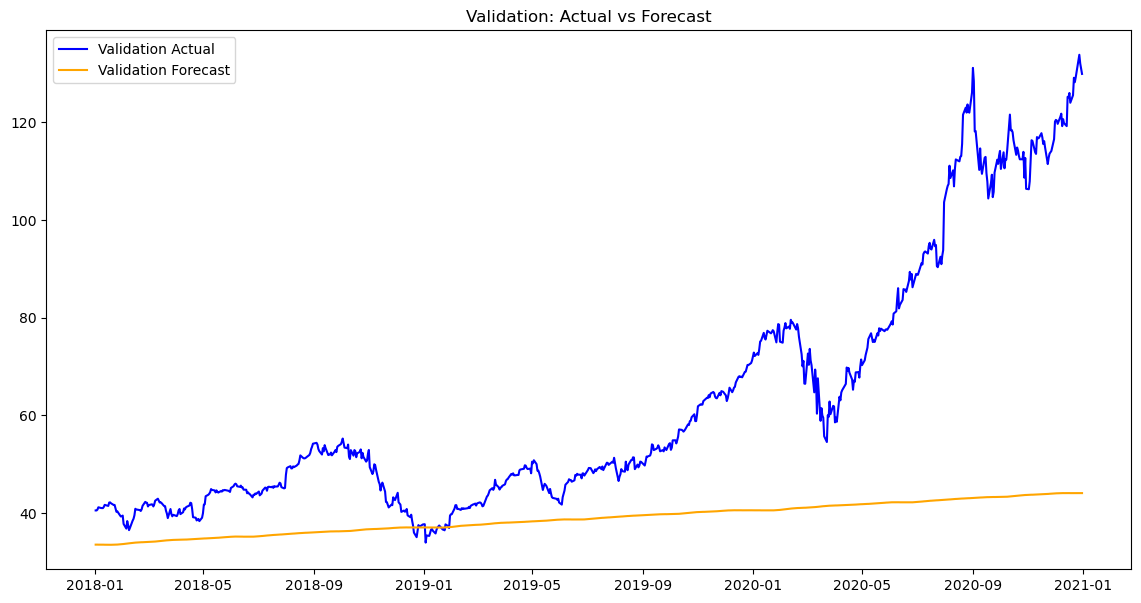

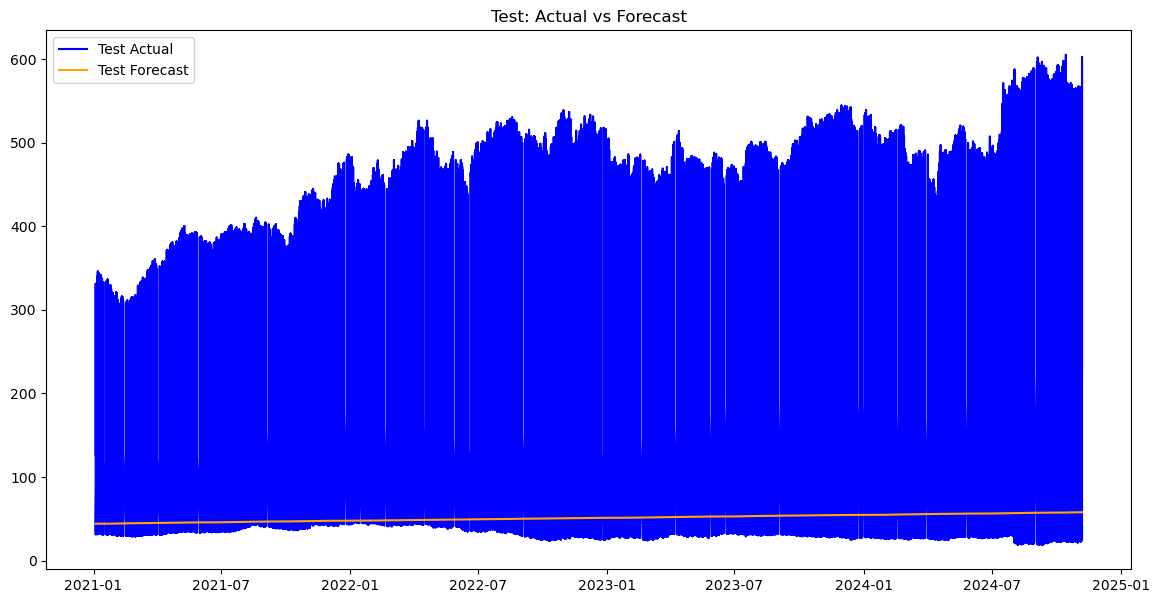

In [18]:
# Initialize the final model with best hyperparameters
final_model = Prophet(
    changepoint_prior_scale=0.01,
    seasonality_prior_scale=0.0001,
    daily_seasonality=True,
    yearly_seasonality=True
)

# Fit the model on the training data
final_model.fit(prophet_train)


# Create future dataframe for validation and test periods
future_dates = final_model.make_future_dataframe(periods=len(prophet_val) + len(test_data), freq='D')

# Forecast for the entire period
forecast = final_model.predict(future_dates)

# Ensure forecast['ds'] and prophet_val['ds'] are tz-naive
forecast['ds'] = pd.to_datetime(forecast['ds']).dt.tz_localize(None)
prophet_val = prophet_val.reset_index()
prophet_val['ds'] = pd.to_datetime(prophet_val['ds']).dt.tz_localize(None)

# Ensure 'Date' in test_data is tz-naive
test_data['Date'] = pd.to_datetime(test_data['Date']).dt.tz_localize(None)

# Split forecast into validation and test sets
forecast_val = forecast[forecast['ds'].isin(prophet_val['ds'])]
forecast_test = forecast[forecast['ds'].isin(test_data['Date'])]

# Reindex validation and test DataFrames for merging
prophet_val = prophet_val.set_index('ds')
forecast_val = forecast_val.set_index('ds')
test_data = test_data.set_index('Date')
forecast_test = forecast_test.set_index('ds')

# Rename 'yhat' column in forecast_val and forecast_test to avoid overlap
forecast_val = forecast_val.rename(columns={'yhat': 'yhat_forecast'})
forecast_test = forecast_test.rename(columns={'yhat': 'yhat_forecast'})

# Merge forecasts with actual values for evaluation
val_results = prophet_val.join(forecast_val[['yhat_forecast']])
test_results = test_data[['Adj Close']].join(forecast_test[['yhat_forecast']])
test_results = test_results.rename(columns={'Adj Close': 'y'})

# Evaluate performance for validation and test sets
val_mae = np.mean(np.abs(val_results['y'] - val_results['yhat_forecast']))
val_rmse = np.sqrt(np.mean((val_results['y'] - val_results['yhat_forecast']) ** 2))

test_mae = np.mean(np.abs(test_results['y'] - test_results['yhat_forecast']))
test_rmse = np.sqrt(np.mean((test_results['y'] - test_results['yhat_forecast']) ** 2))

# Print results
print(f"Validation MAE: {val_mae}, Validation RMSE: {val_rmse}")
print(f"Test MAE: {test_mae}, Test RMSE: {test_rmse}")

# Plot validation forecasts
plt.figure(figsize=(14, 7))
plt.plot(prophet_val.index, prophet_val['y'], label='Validation Actual', color='blue')
plt.plot(forecast_val.index, forecast_val['yhat_forecast'], label='Validation Forecast', color='orange')
plt.title('Validation: Actual vs Forecast')
plt.legend()
plt.show()

# Plot test forecasts
plt.figure(figsize=(14, 7))
plt.plot(test_results.index, test_results['y'], label='Test Actual', color='blue')
plt.plot(test_results.index, test_results['yhat_forecast'], label='Test Forecast', color='orange')
plt.title('Test: Actual vs Forecast')
plt.legend()
plt.show()


Prophet still seems to be performing bad let me analyze trends and seasonality 

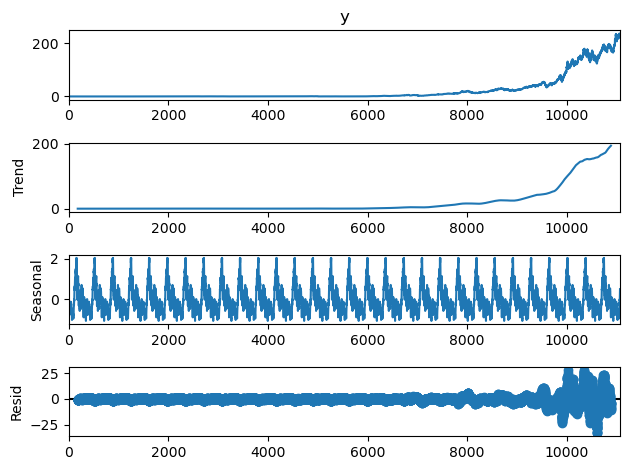

In [19]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(aapl_data['y'], model='additive', period=365)
decomposition.plot()
plt.show()

Prophet works best on datasets with clear trends and seasonality. If stock price data is highly volatile, Prophet may struggle, and machine learning models like XGBoost or LSTMs could provide better results. Unless I can think of a better way to approach this I will move onto different models.

### ARIMA

ARIMA requires a stationary series (constant mean and variance over time). Will use Augmented Dickey-Fuller to check for stationarity.

In [20]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(aapl_data['y'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: 3.8831187316386653
p-value: 1.0


Since the p-value is > 0.5 the data is non-stationary and need differencing.

In [21]:
# Apply differencing
aapl_data['y_diff'] = aapl_data['y'].diff()

# Drop NaN values introduced by differencing
aapl_data = aapl_data.dropna()

# Set 'ds' as the index for 'aapl_data'
aapl_data.set_index('ds', inplace=True)

In [22]:
# Split data into train and test
train = aapl_data[aapl_data.index <= '2017-12-31']['y_diff']
test = aapl_data[(aapl_data.index > '2017-12-31') & (aapl_data.index <= '2020-12-31')]['y_diff']

In [23]:
from pmdarima import auto_arima
model = auto_arima(
    train,
    seasonal=False,   # Non-seasonal ARIMA
    trace=True,       
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=8.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2993.923, Time=0.52 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-5376.251, Time=2.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.39 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2995.923, Time=0.27 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-6403.616, Time=1.66 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-7170.312, Time=1.21 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-7560.291, Time=1.63 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-7791.664, Time=1.97 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-9113.418, Time=8.87 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-9115.019, Time=7.81 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=7.70 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=9.94 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=7.09 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=inf, Ti

In [24]:
from statsmodels.tsa.arima.model import ARIMA

p, d, q = model.order
arima_model = ARIMA(train, order=(p, d, q))
arima_model_fit = arima_model.fit()
print(arima_model_fit.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 y_diff   No. Observations:                 9343
Model:                 ARIMA(4, 1, 1)   Log Likelihood                4626.769
Date:                Sun, 01 Dec 2024   AIC                          -9241.539
Time:                        01:28:41   BIC                          -9198.685
Sample:                             0   HQIC                         -9226.984
                               - 9343                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0241      0.004      6.252      0.000       0.017       0.032
ar.L2         -0.0250      0.005     -5.538      0.000      -0.034      -0.016
ar.L3         -0.0256      0.004     -6.343      0.0

In [25]:
forecast = arima_model_fit.forecast(steps=len(test))
forecast = pd.Series(forecast, index=test.index)  # Align index

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [26]:
# Revert differencing to get back to the original scale
last_train_value = aapl_data.loc[train.index[-1], 'y']
forecast_cumsum = forecast.cumsum() + last_train_value

In [27]:
# Reindex forecast_cumsum to align with test_actual
forecast_cumsum = forecast_cumsum.reindex(test_actual.index)

NameError: name 'test_actual' is not defined

In [ ]:
# Drop NaN values in forecast_cumsum
forecast_cumsum = forecast_cumsum.dropna()

# Ensure test_actual has no missing values
test_actual = aapl_data.loc[test.index, 'y'].dropna()

In [ ]:
# Align indices between test_actual and forecast_cumsum
forecast_cumsum = forecast_cumsum[test_actual.index]

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

test_actual = aapl_data.loc[test.index, 'y']
mae = mean_absolute_error(test_actual, forecast_cumsum)
rmse = np.sqrt(mean_squared_error(test_actual, forecast_cumsum))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, forecast_cumsum, label='ARIMA Forecast', color='orange')
plt.title('ARIMA Forecast vs Actual')
plt.legend()
plt.show()

In [ ]:
future_forecast = arima_model_fit.forecast(steps=365)
future_forecast_cumsum = future_forecast.cumsum() + aapl_data['y'].iloc[train.index[-1]]

plt.figure(figsize=(14, 7))
plt.plot(aapl_data['ds'], aapl_data['y'], label='Actual Data')
plt.plot(pd.date_range(start='2021-01-01', periods=365, freq='D'), future_forecast_cumsum, label='ARIMA Forecast', color='green')
plt.title('ARIMA Future Forecast')
plt.legend()
plt.show()

### Exponential smoothing with tuned parameters

### Nixtla

### CatBoost